In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore
import yfinance as yf # type: ignore
from statsmodels.tsa.seasonal import seasonal_decompose # type: ignore

In [4]:
from scripts.data_loader import loadData
tsla_data, bnd_data, spy_data = loadData()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
from scripts.data_loader import format_date

data = format_date

In [6]:
rows, columns = tsla_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2535
Number of columns: 6


In [7]:
tsla_data.head(rows)


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,,TSLA
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...
2025-01-24,414.450012,418.880005,405.779999,406.579987,406.579987,56427100
2025-01-27,394.799988,406.690002,389.000000,397.149994,397.149994,58125500


In [8]:
tsla_data.describe()


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,,TSLA
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,117.877662,120.474827,115.097514,117.848209,117.848209,1.120308e+08
std,116.611575,119.236025,113.698930,116.508288,116.508288,7.387509e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,17.259334,17.527667,16.942000,17.228000,17.228000,6.680295e+07
50%,31.299999,32.329334,29.760000,30.298000,30.298000,9.264180e+07
75%,222.653336,226.696671,217.061661,221.525002,221.525002,1.294283e+08
max,475.899994,488.540009,457.510010,479.859985,479.859985,9.140820e+08


In [9]:
tsla_data.dtypes


Price      Ticker
Open       TSLA      float64
High       TSLA      float64
Low        TSLA      float64
Close      TSLA      float64
Adj Close            float64
Volume     TSLA        int64
dtype: object

In [10]:
tsla_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, TSLA)    2535 non-null   float64
 1   (High, TSLA)    2535 non-null   float64
 2   (Low, TSLA)     2535 non-null   float64
 3   (Close, TSLA)   2535 non-null   float64
 4   (Adj Close, )   2535 non-null   float64
 5   (Volume, TSLA)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


In [11]:
rows, columns = bnd_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2535
Number of columns: 6


In [12]:
bnd_data.head(rows)

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,BND,BND,BND,BND,,BND
Date,,,,,,
2015-01-02,62.406591,62.603435,62.399018,62.573151,62.573151,2218800
2015-01-05,62.641296,62.777572,62.611012,62.754860,62.754860,5820100
2015-01-06,62.860835,63.125814,62.860835,62.936543,62.936543,3887600
2015-01-07,62.944085,63.050076,62.875950,62.974369,62.974369,2433400
2015-01-08,62.921377,62.921377,62.815385,62.875954,62.875954,1873400
...,...,...,...,...,...,...
2025-01-24,71.766106,71.855810,71.636531,71.805977,71.805977,5555700
2025-01-27,72.104996,72.204677,72.025262,72.184738,72.184738,8621200


In [13]:
bnd_data.describe()

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,BND,BND,BND,BND,,BND
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,69.293224,69.391260,69.186011,69.289450,69.289450,4.233200e+06
std,4.793199,4.800409,4.782142,4.792146,4.792146,2.796083e+06
min,61.891469,61.937361,61.822635,61.860874,61.860874,0.000000e+00
25%,65.552727,65.630173,65.475488,65.565266,65.565266,2.057700e+06
50%,68.310211,68.457862,68.169740,68.329132,68.329132,3.805800e+06
75%,72.845701,72.946441,72.728790,72.879925,72.879925,5.626700e+06
max,78.884927,78.920157,78.788051,78.823288,78.823288,3.193720e+07


In [14]:
bnd_data.dtypes

Price      Ticker
Open       BND       float64
High       BND       float64
Low        BND       float64
Close      BND       float64
Adj Close            float64
Volume     BND         int64
dtype: object

In [15]:
bnd_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Open, BND)    2535 non-null   float64
 1   (High, BND)    2535 non-null   float64
 2   (Low, BND)     2535 non-null   float64
 3   (Close, BND)   2535 non-null   float64
 4   (Adj Close, )  2535 non-null   float64
 5   (Volume, BND)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


In [16]:
rows, columns = spy_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2535
Number of columns: 6


In [17]:
spy_data.head(rows)


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,SPY,SPY,SPY,SPY,,SPY
Date,,,,,,
2015-01-02,173.391022,173.811099,171.542672,172.592865,172.592865,121465900
2015-01-05,171.534266,171.702294,169.165038,169.475891,169.475891,169632600
2015-01-06,169.786826,170.316127,167.073130,167.879684,167.879684,209151400
2015-01-07,169.223927,170.316131,168.770250,169.971664,169.971664,125346700
2015-01-08,171.399886,173.206226,171.383093,172.987778,172.987778,147217800
...,...,...,...,...,...,...
2025-01-24,609.809998,610.780029,606.799988,607.969971,607.969971,34604700
2025-01-27,594.809998,599.690002,594.640015,599.369995,599.369995,70361100


In [18]:
spy_data.describe()


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,SPY,SPY,SPY,SPY,,SPY
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,316.021385,317.725660,314.157889,316.067402,316.067402,8.714655e+07
std,117.921618,118.486410,117.269902,117.926910,117.926910,4.487253e+07
min,156.354974,157.864167,154.676883,156.800873,156.800873,2.027000e+07
25%,214.972492,215.702238,214.206908,214.841980,214.841980,5.862005e+07
50%,277.230781,277.919549,276.073612,277.117950,277.117950,7.642870e+07
75%,406.100271,409.134356,402.830858,405.869186,405.869186,1.018866e+08
max,609.809998,610.780029,606.799988,609.750000,609.750000,5.072443e+08


In [19]:
spy_data.dtypes


Price      Ticker
Open       SPY       float64
High       SPY       float64
Low        SPY       float64
Close      SPY       float64
Adj Close            float64
Volume     SPY         int64
dtype: object

In [20]:
spy_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Open, SPY)    2535 non-null   float64
 1   (High, SPY)    2535 non-null   float64
 2   (Low, SPY)     2535 non-null   float64
 3   (Close, SPY)   2535 non-null   float64
 4   (Adj Close, )  2535 non-null   float64
 5   (Volume, SPY)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


In [21]:
spy_data.dtypes

Price      Ticker
Open       SPY       float64
High       SPY       float64
Low        SPY       float64
Close      SPY       float64
Adj Close            float64
Volume     SPY         int64
dtype: object

In [22]:
from scripts.data_cleaning import preprocess_data
tsla_data = preprocess_data(tsla_data,"TSLA")
bnd_data = preprocess_data(bnd_data,"BND")
spy_data = preprocess_data(spy_data,"SPY")

TSLA Missing values:
Price      Ticker
Open       TSLA      0
High       TSLA      0
Low        TSLA      0
Close      TSLA      0
Adj Close            0
Volume     TSLA      0
dtype: int64
BND Missing values:
Price      Ticker
Open       BND       0
High       BND       0
Low        BND       0
Close      BND       0
Adj Close            0
Volume     BND       0
dtype: int64
SPY Missing values:
Price      Ticker
Open       SPY       0
High       SPY       0
Low        SPY       0
Close      SPY       0
Adj Close            0
Volume     SPY       0
dtype: int64


In [23]:
from scripts.plots import*

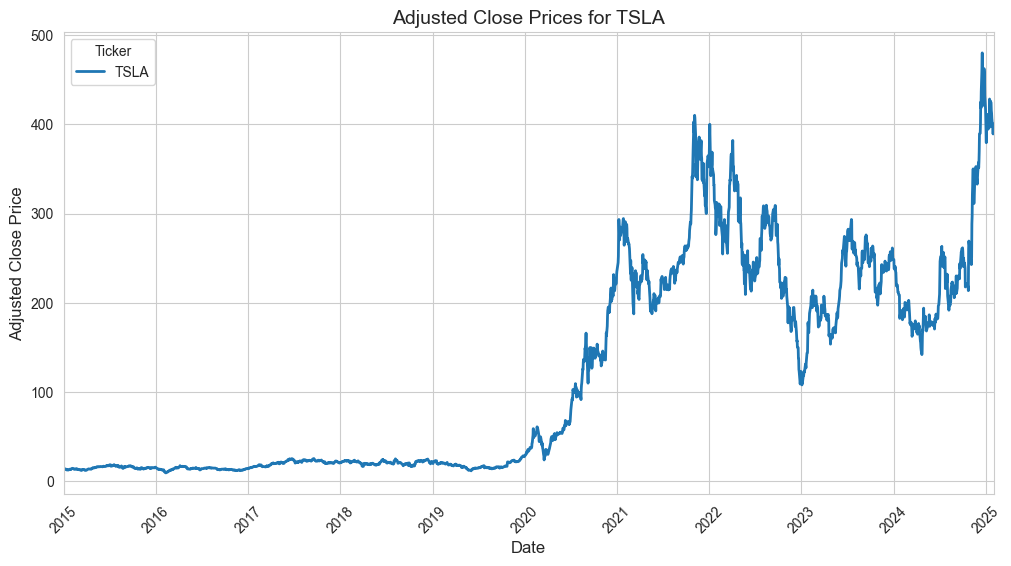

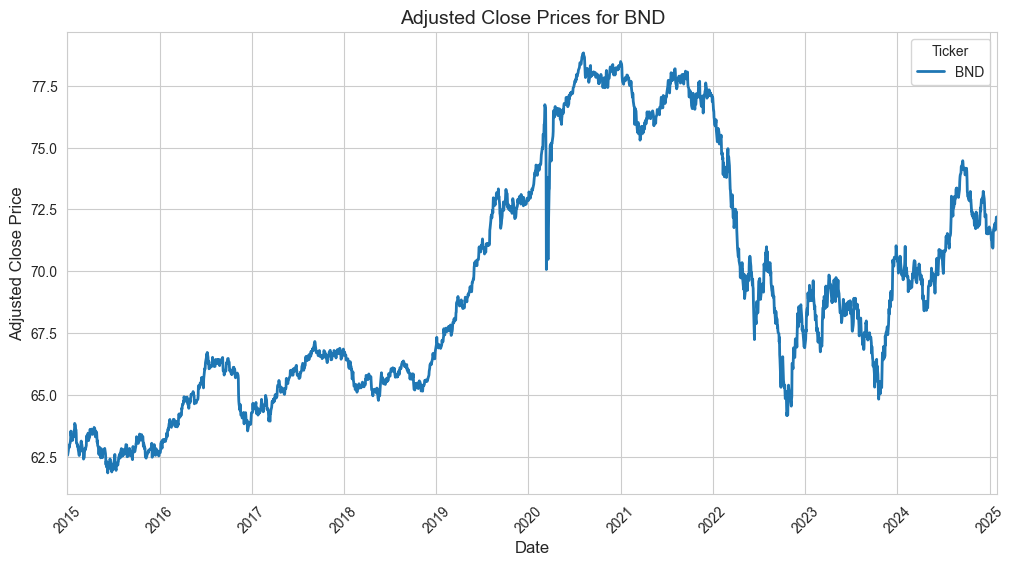

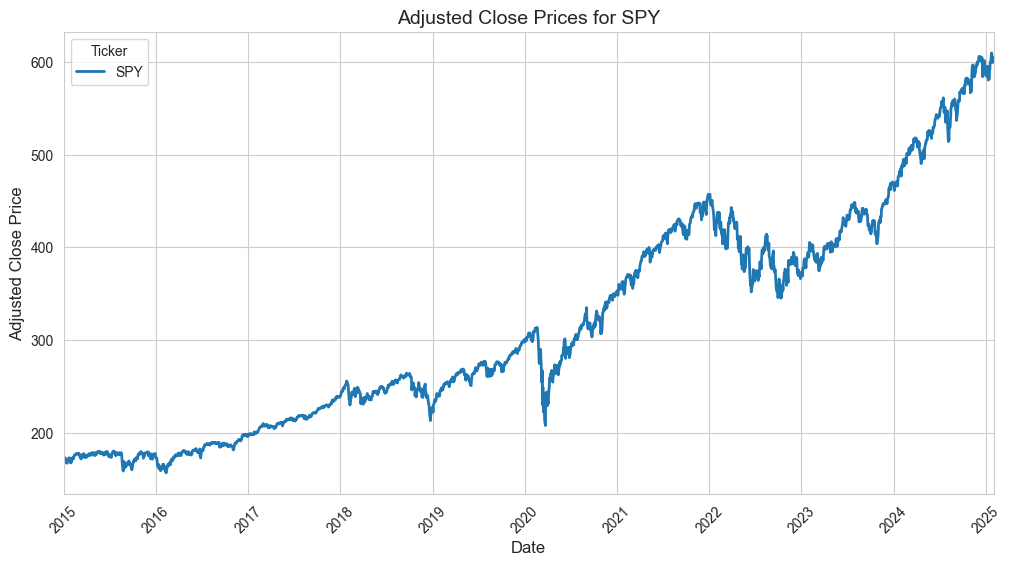

In [24]:
closePriceOverTime([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])

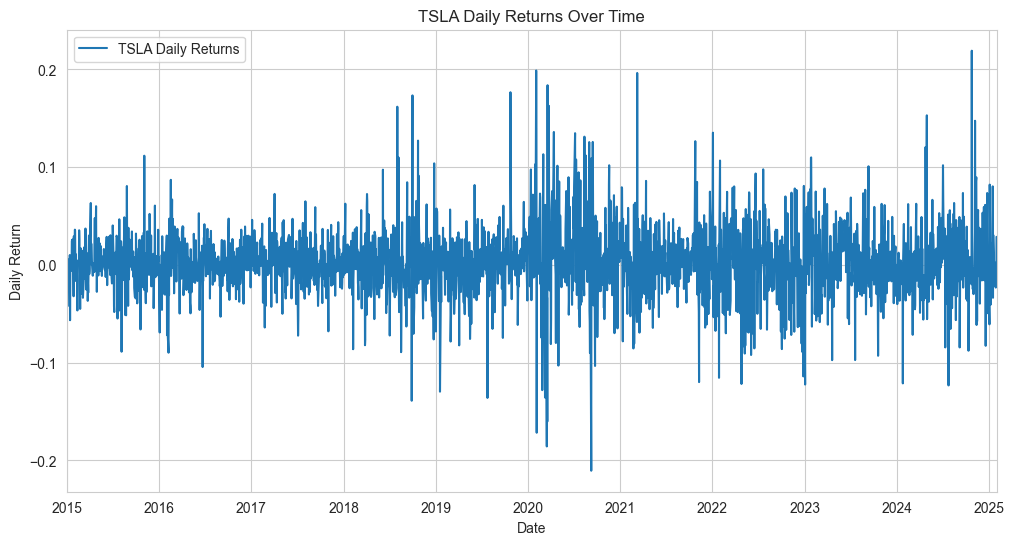

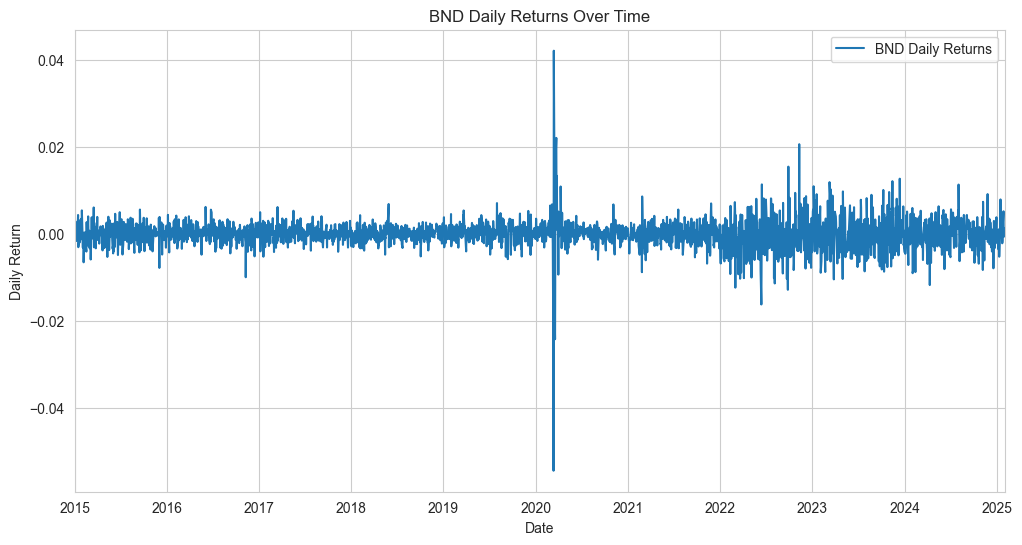

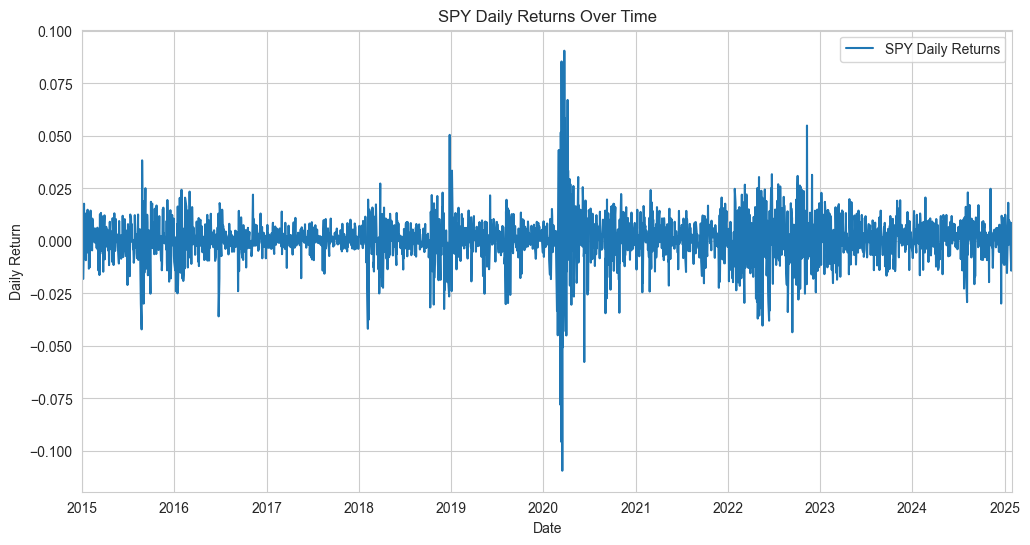

In [25]:
dailyReturn([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


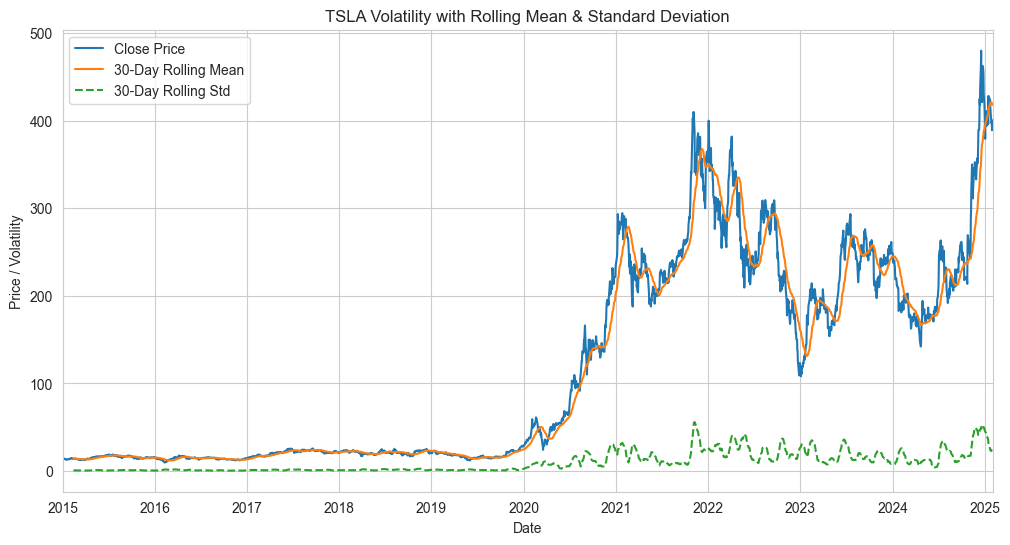

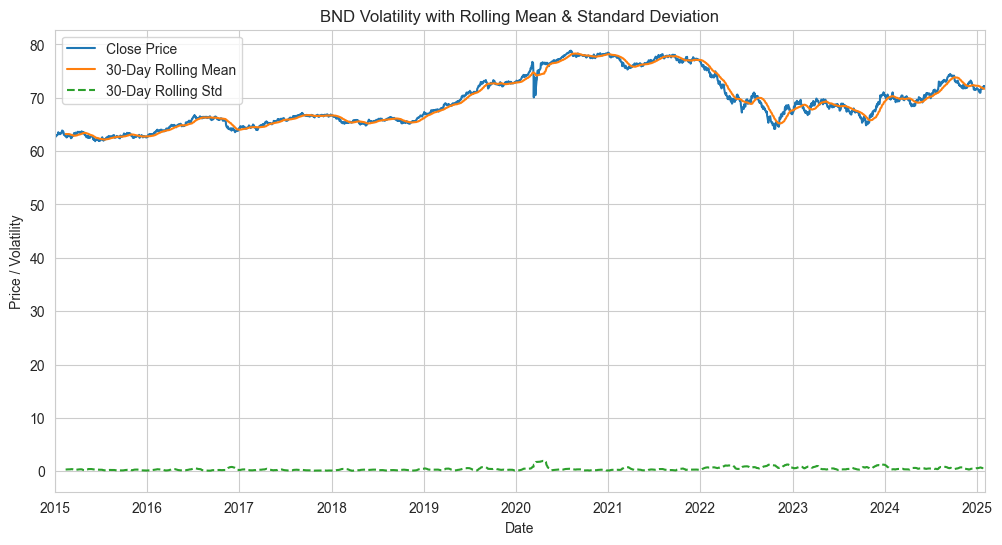

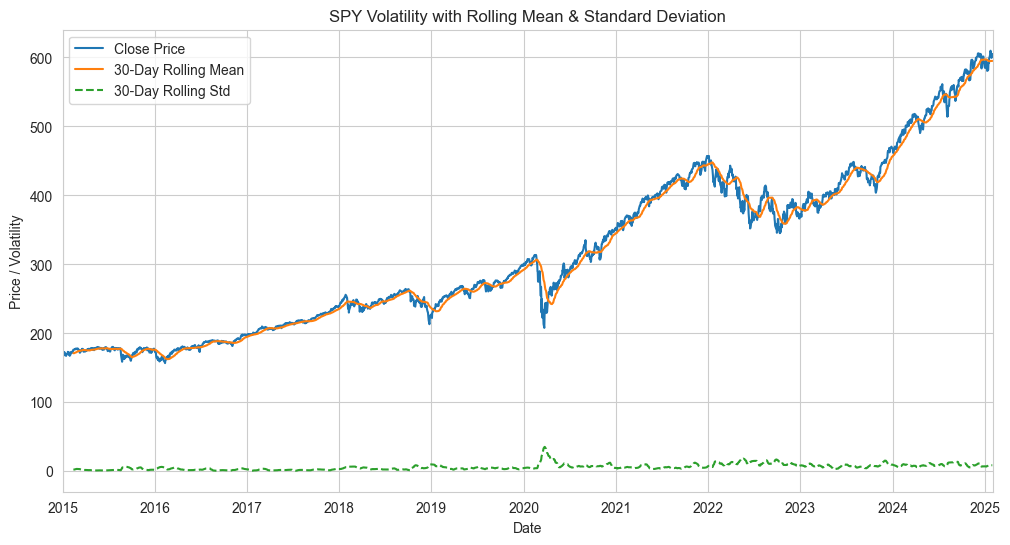

In [26]:
rollingAvgAndStd([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


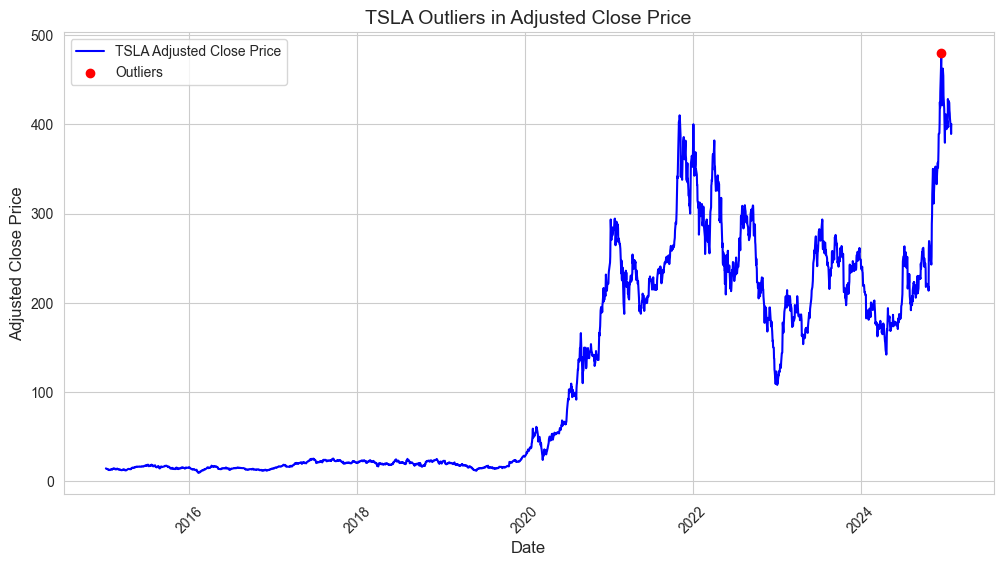


Outliers for TSLA:
                 Price   Z-Score Ticker
Date                                   
2024-12-17  479.859985  3.107176   TSLA


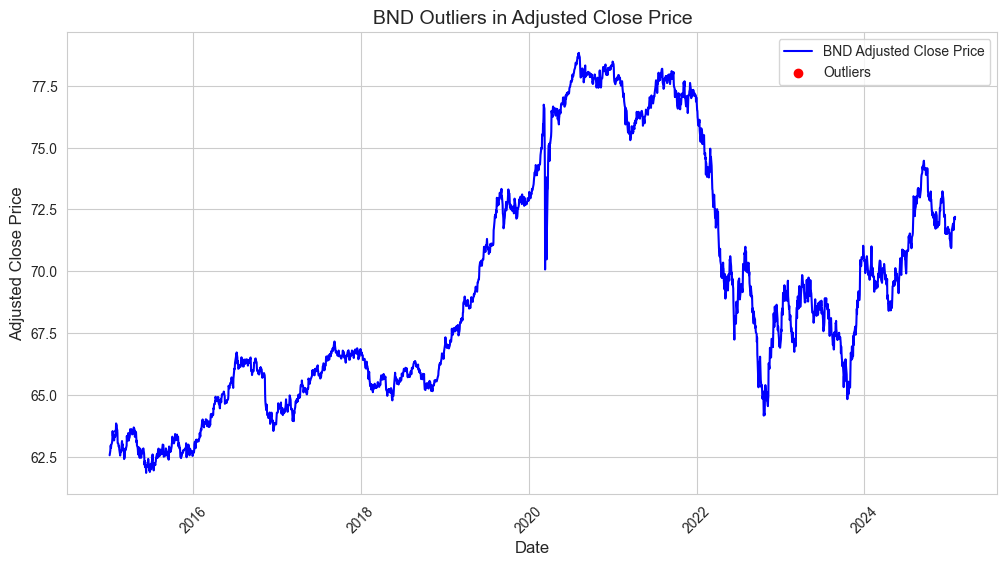


Outliers for BND:
Empty DataFrame
Columns: [Price, Adj Close, Z-Score]
Index: []


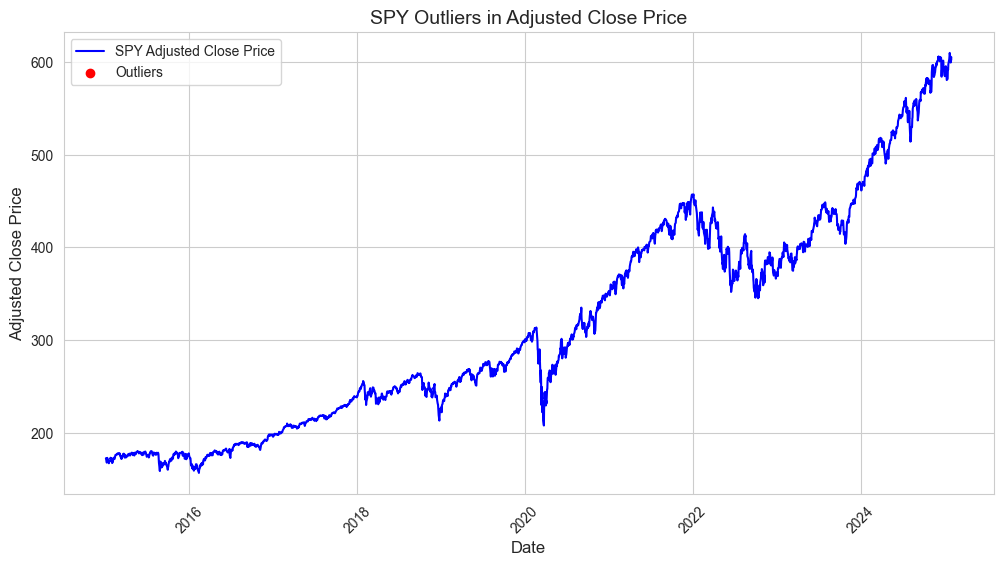


Outliers for SPY:
Empty DataFrame
Columns: [Price, Adj Close, Z-Score]
Index: []


In [27]:
detect_outliers([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])

In [28]:
cleaned_tsla, cleaned_bnd, cleaned_spy = remove_outliers([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])



Removed Outliers for TSLA:
Price        Adj Close   Z-Score
Ticker                          
Date                            
2024-12-17  479.859985  3.107176

Removed Outliers for BND:
No outliers found.

Removed Outliers for SPY:
No outliers found.


In [29]:
print(cleaned_tsla.loc['2024-12-17'] if '2024-12-17' in cleaned_tsla.index else "Outlier removed!")


Outlier removed!


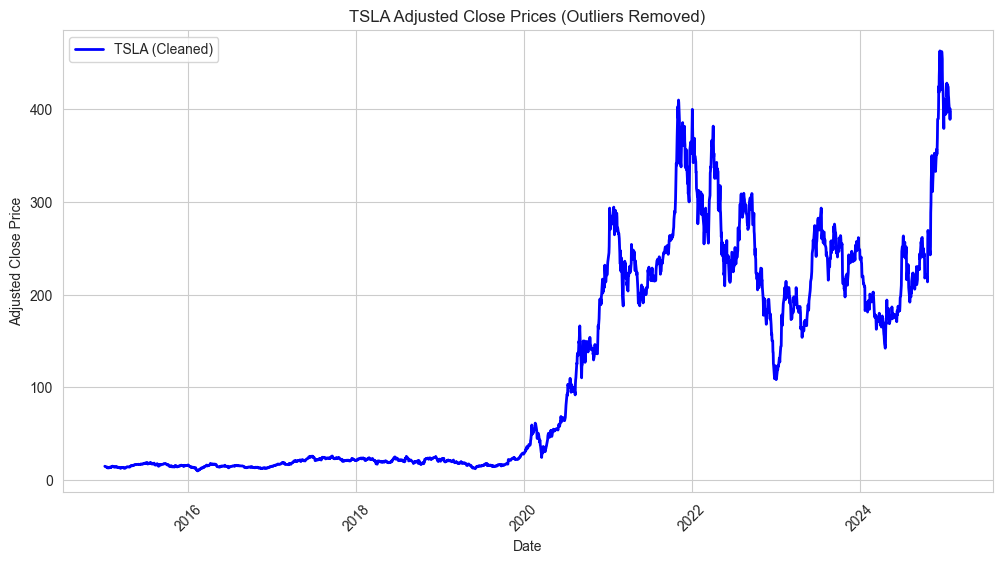

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_tsla.index, cleaned_tsla['Adj Close'], label="TSLA (Cleaned)", linewidth=2, color="blue")
plt.title("TSLA Adjusted Close Prices (Outliers Removed)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [31]:
from scripts.plots import calc_daily_return
calc_daily_return

<function scripts.plots.calc_daily_return(stockData, tickers)>

In [32]:
for df in [tsla_data, bnd_data, spy_data]:
    if 'Close' in df.columns and 'Daily Return' not in df.columns:
        df['Daily Return'] = df['Close'].pct_change() * 100  # Convert to percentage


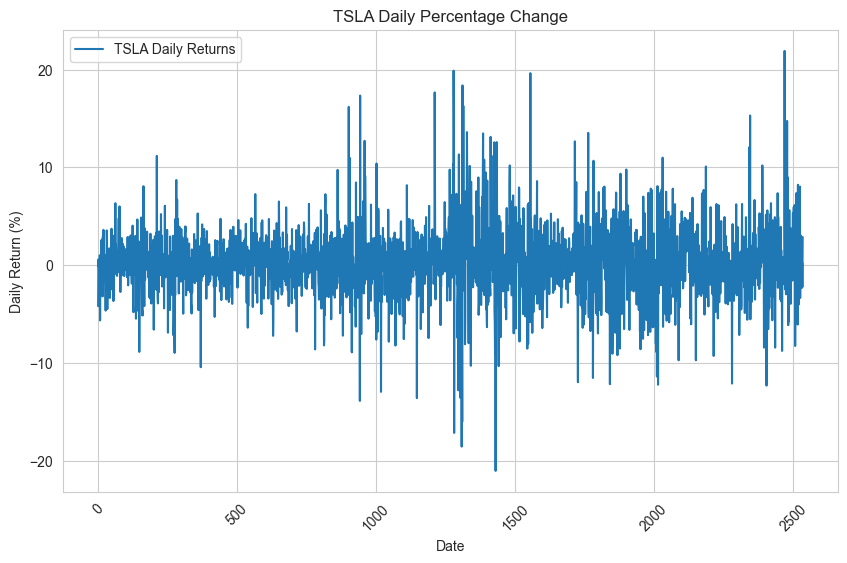

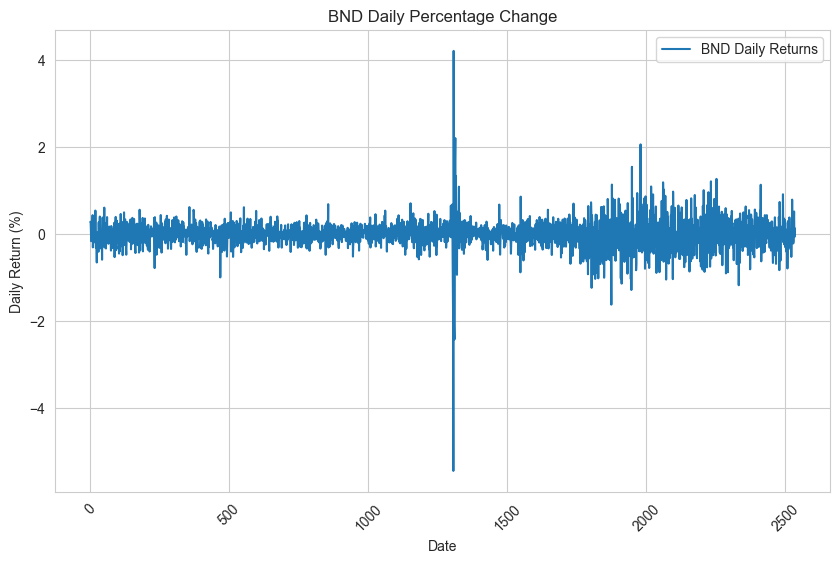

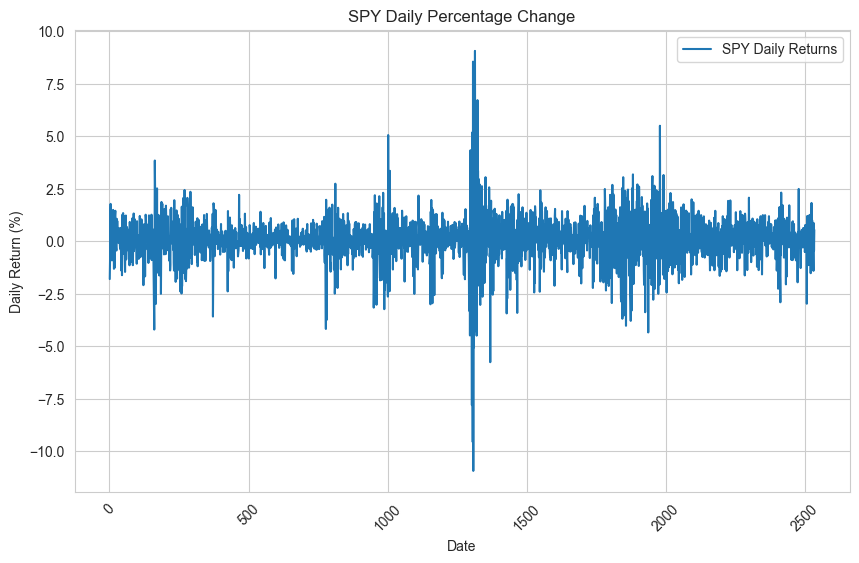

In [33]:
plot_daily_percentage([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])


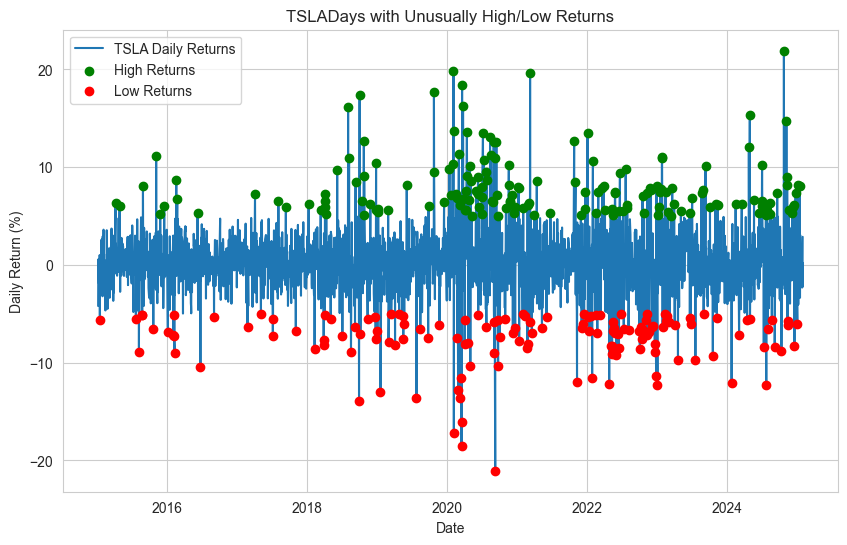

TSLAHigh Returns for:
Price      Daily Return
Ticker                 
Date                   
2015-04-06     6.335084
2015-04-27     6.006504
2015-08-27     8.072407
2015-11-04    11.173506
2015-11-25     5.218781
...                 ...
2024-12-11     5.930322
2024-12-16     6.141251
2024-12-24     7.357174
2025-01-03     8.215567
2025-01-15     8.038151

[169 rows x 1 columns]


TSLALow Returns for:
Price      Daily Return
Ticker                 
Date                   
2015-01-14    -5.659734
2015-07-21    -5.487851
2015-08-06    -8.884613
2015-08-20    -5.120475
2015-08-24    -5.156654
...                 ...
2024-10-11    -8.782511
2024-11-12    -6.145717
2024-11-14    -5.771560
2024-12-18    -8.279494
2025-01-02    -6.081616

[142 rows x 1 columns]




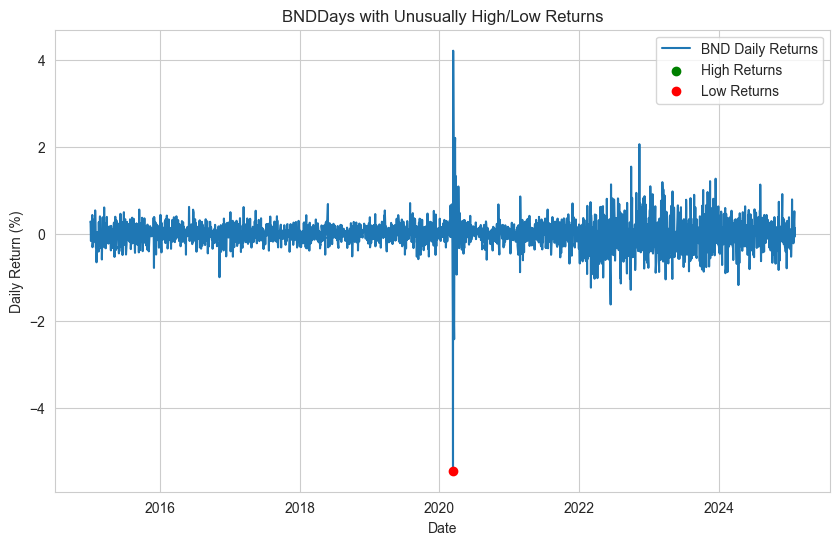

BNDHigh Returns for:
Empty DataFrame
Columns: [(Daily Return, )]
Index: []


BNDLow Returns for:
Price      Daily Return
Ticker                 
Date                   
2020-03-12    -5.438493




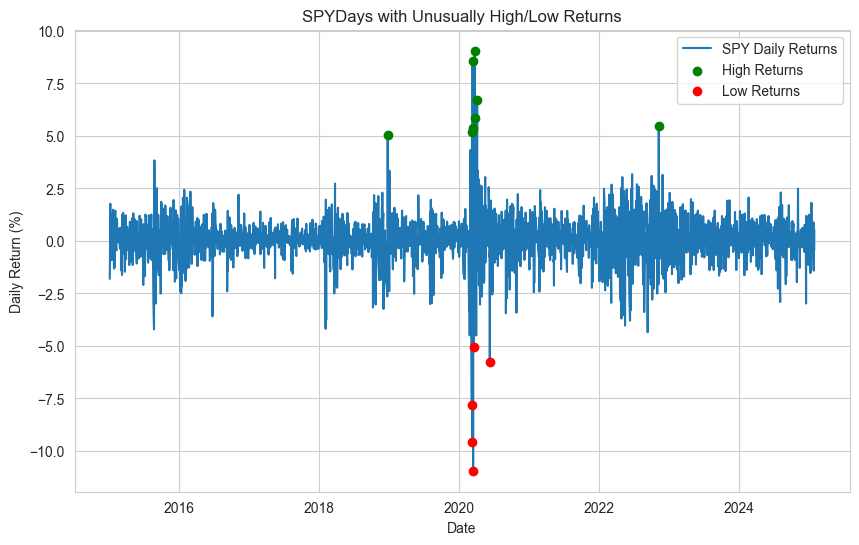

SPYHigh Returns for:
Price      Daily Return
Ticker                 
Date                   
2018-12-26     5.052492
2020-03-10     5.174440
2020-03-13     8.548654
2020-03-17     5.399227
2020-03-24     9.060345
2020-03-26     5.838962
2020-04-06     6.716658
2022-11-10     5.495406


SPYLow Returns for:
Price      Daily Return
Ticker                 
Date                   
2020-03-09    -7.809429
2020-03-12    -9.567734
2020-03-16   -10.942396
2020-03-18    -5.063302
2020-06-11    -5.764853




In [34]:
# Ensure 'Daily Return' exists and 'Date' is the index
for df in [tsla_data, bnd_data, spy_data]:
    if 'Close' in df.columns and 'Daily Return' not in df.columns:
        df['Daily Return'] = df['Close'].pct_change() * 100  
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

# Call the function
plot_significant_anomalies([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])


<Figure size 1200x600 with 0 Axes>

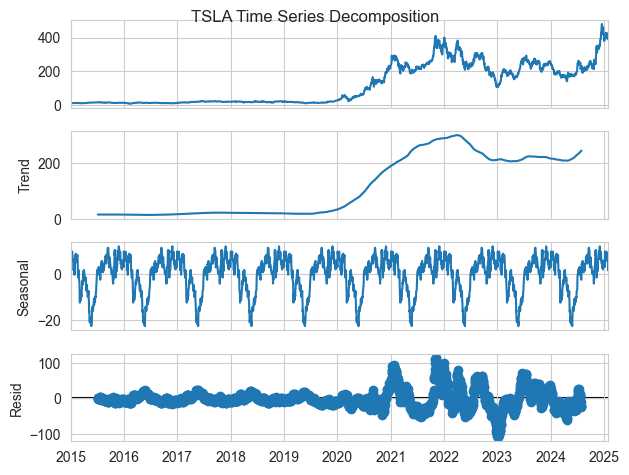

<Figure size 1200x600 with 0 Axes>

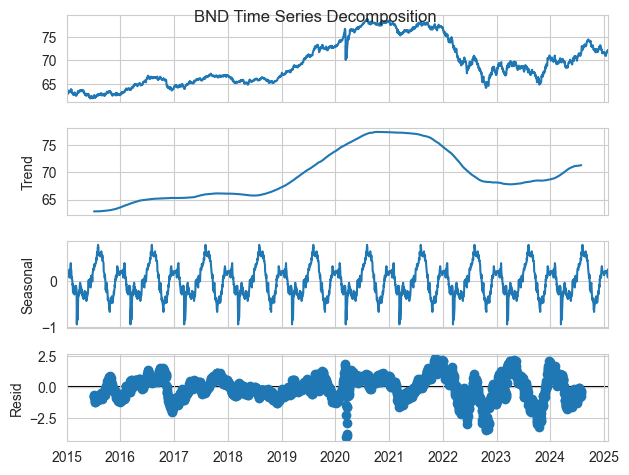

<Figure size 1200x600 with 0 Axes>

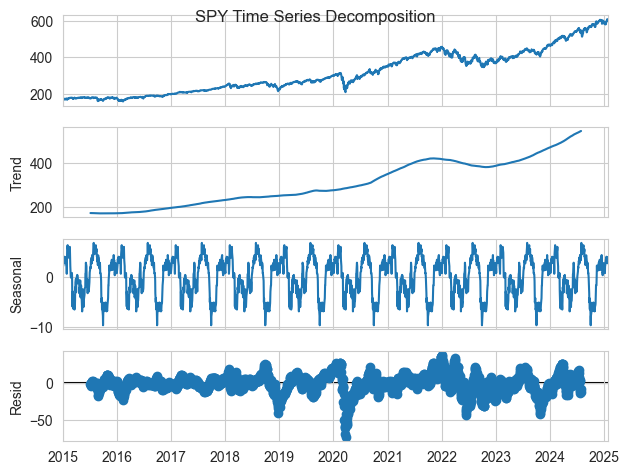

In [35]:
timeSeriesDecomposition([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


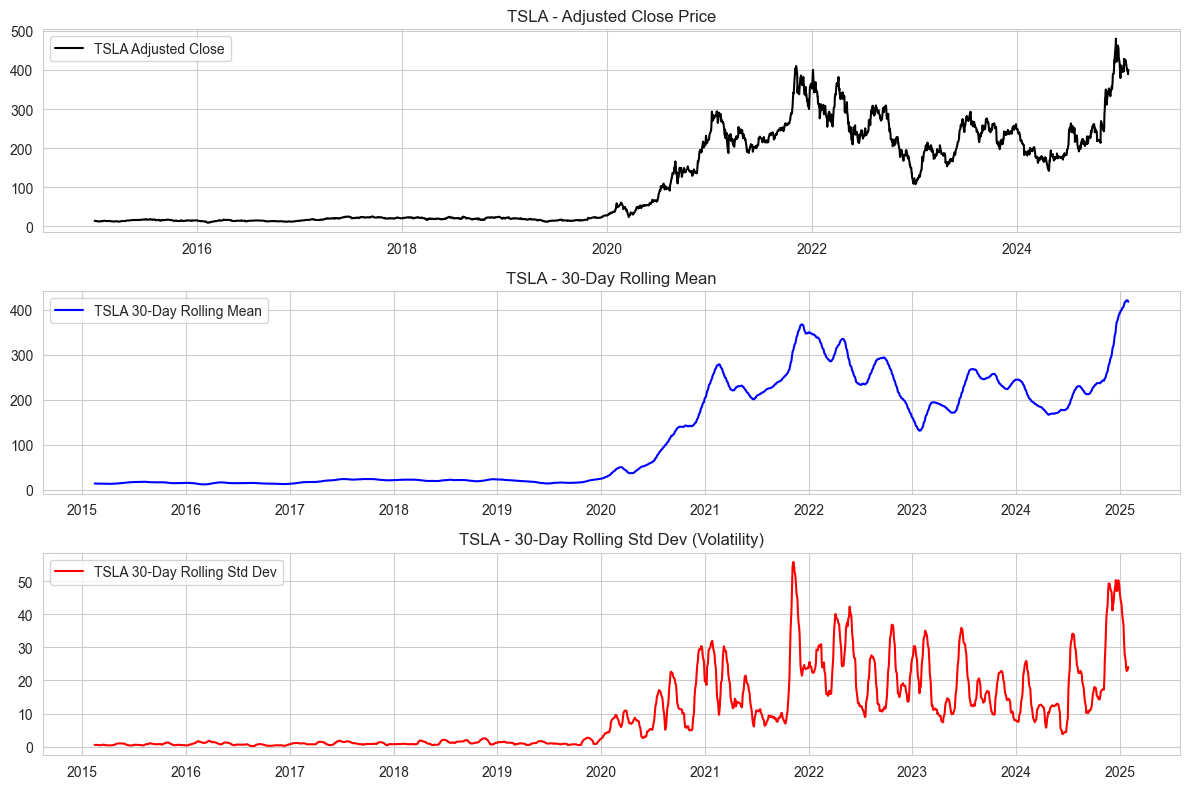

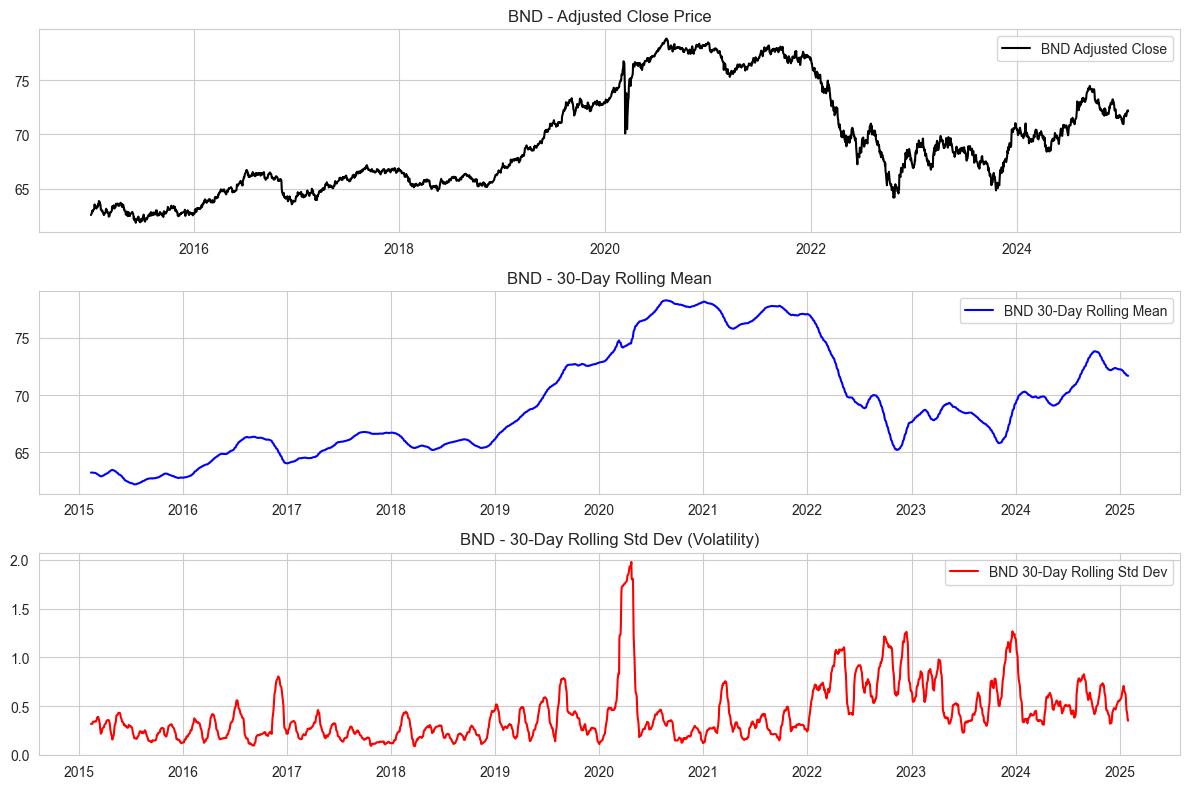

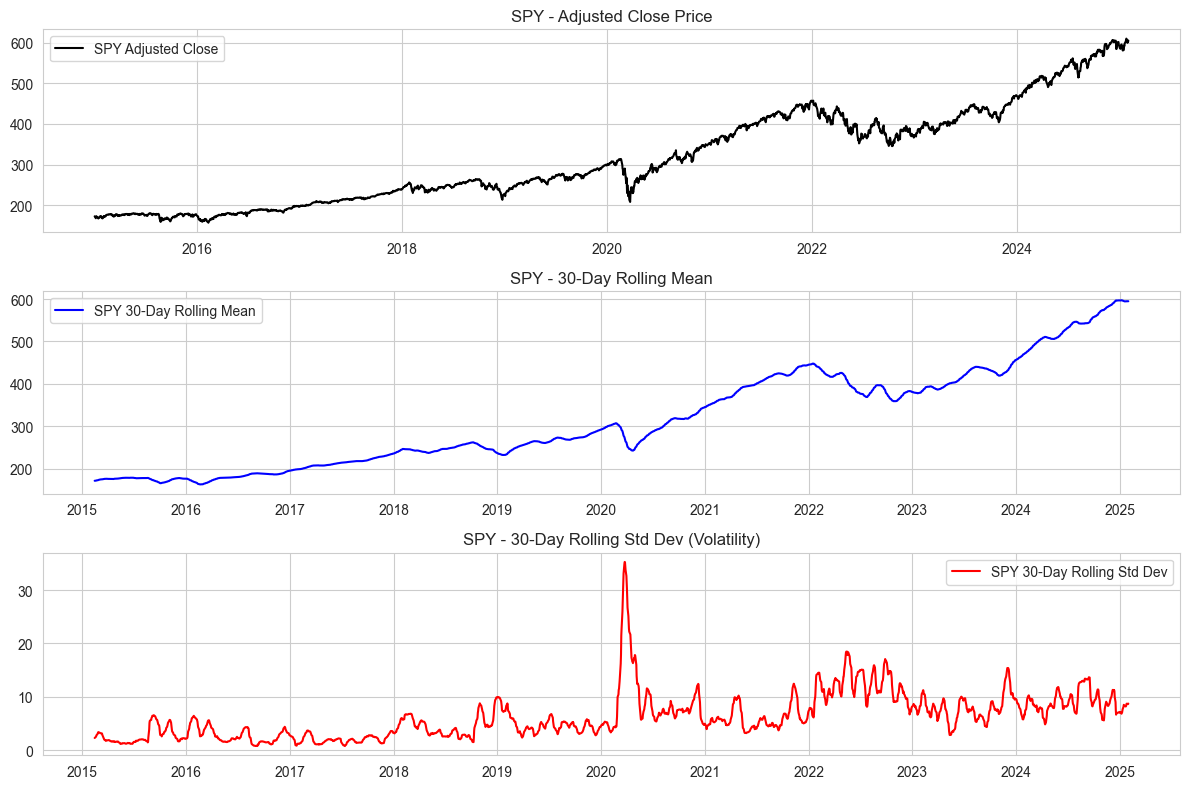

In [36]:
# Define the window size for rolling calculations
window_size = 30  # 30 days

volatility_rolling(window_size, [tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])


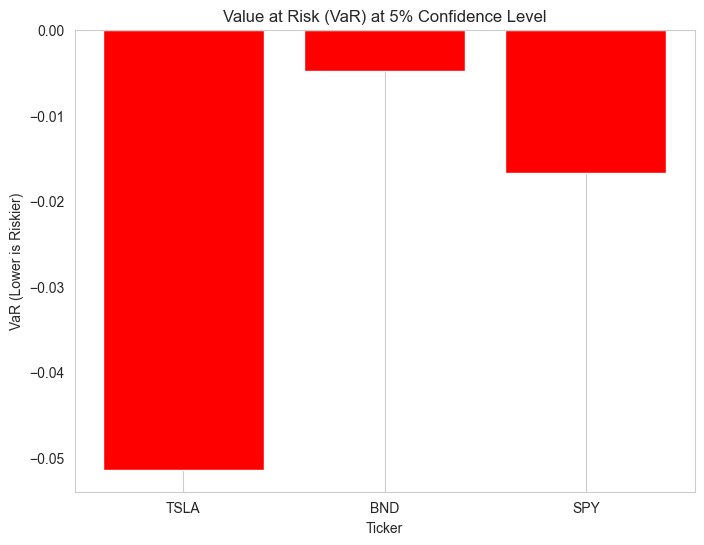

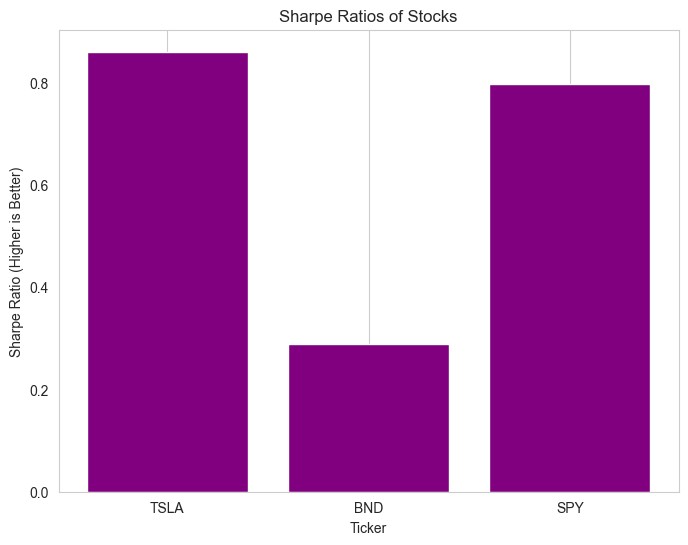


Value at Risk (VaR) at 5% Confidence Level:
TSLA: -0.0514
BND: -0.0048
SPY: -0.0167

Sharpe Ratios:
TSLA: 0.8607
BND: 0.2890
SPY: 0.7975


In [37]:
varAndSharpeRatio([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])
